Используя базу данных фильмов из практической части урока, проверте следующие гипотезы:

1. Большинство фильмов выпускаются по пятницам
2. Известные актеры снимаются в самых кассовых фильмах
3. Известные актеры снимаются в самыx дорогих фильмах

Построить графики по гипотезам. Сколько актеров из вашего результата вам знакомы?

3503 4641 7035 7525 13908 5151 3613


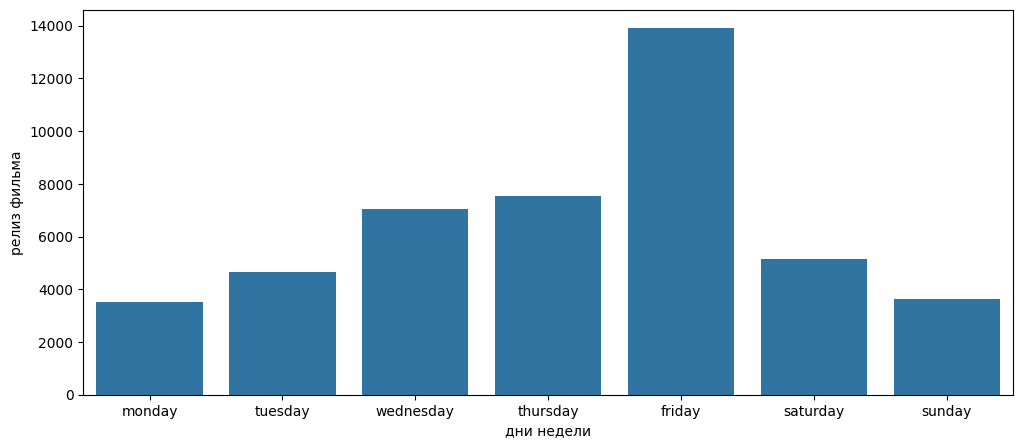

In [ ]:
from requests import get
response = get("https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip")

with open('the_movies_dataset.zip', 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

!unzip -qo "the_movies_dataset.zip" -d ./the_movies_dataset
FILE_PATH = './the_movies_dataset'

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
df = pd.read_csv(f'{FILE_PATH}/movies_metadata.csv')

only_date_releasy = df['release_date']
only_date_releasy = pd.DataFrame(only_date_releasy)
all_int = only_date_releasy.shape[0]

only_date_releasy['release_date'] = only_date_releasy['release_date'].apply(lambda x: list(map(int, x.split('-'))) if type(x) == str else np.nan)

import datetime

only_date_releasy['release_date'] = only_date_releasy['release_date'].apply(lambda x: datetime.date(x[0], x[1], x[2]).weekday() if type(x) == list and len(x) == 3 else np.nan)

monday = only_date_releasy[only_date_releasy['release_date'] == 0].shape[0]
tuesday = only_date_releasy[only_date_releasy['release_date'] == 1].shape[0]
wednesday = only_date_releasy[only_date_releasy['release_date'] == 2].shape[0]
thursday = only_date_releasy[only_date_releasy['release_date'] == 3].shape[0]
friday = only_date_releasy[only_date_releasy['release_date'] == 4].shape[0]
saturday = only_date_releasy[only_date_releasy['release_date'] == 5].shape[0]
sunday = only_date_releasy[only_date_releasy['release_date'] == 6].shape[0]
print(monday, tuesday, wednesday, thursday, friday, saturday, sunday)

day_of_weeks = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
counts_films = [monday, tuesday, wednesday, thursday, friday, saturday, sunday]
new_dataframe = pd.DataFrame({'дни недели': day_of_weeks, 'релиз фильма': counts_films})

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.barplot(x='дни недели', y='релиз фильма', data=new_dataframe)
plt.show()

In [ ]:
credits_df = pd.read_csv('./the_movies_dataset/credits.csv')

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

df['id'] = df['id'].apply(convert_int)

df = df.drop(df[df['id'].isnull()].index)
df['id'] = df['id'].astype('int')       # вот это astype - тоже не понятно что конкретно делает? что значит УСТАНОВИМ ТИП ?

df_merge = df.merge(credits_df, on='id')
for_2_quest = df_merge[['budget', 'popularity', 'revenue', 'title', 'vote_average', 'vote_count', 'cast']]

In [ ]:
import ast
for_2_quest['cast'] = for_2_quest['cast'].apply(ast.literal_eval)


In [ ]:
def actor(x):               # но по факту так неправильно - ведь актеров там много в каждом фильме - ф так получается берем только 1
    for i in x:
            return i['name']

for_2_quest['actor'] = for_2_quest['cast'].apply(actor)

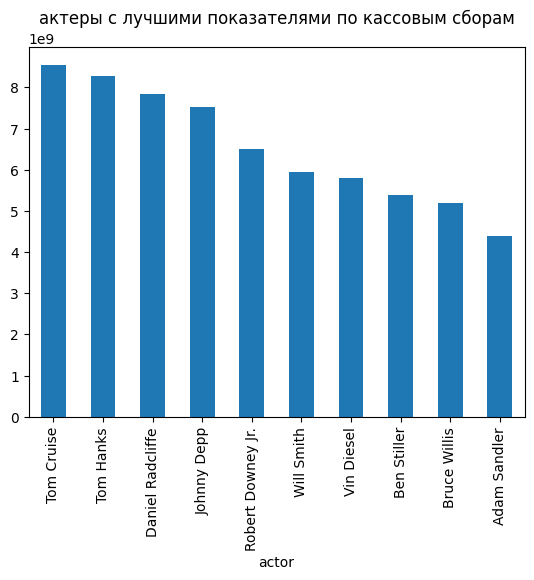

In [ ]:
for_2_quest['budget'] = pd.to_numeric(for_2_quest['budget'], errors='coerce')
for_2_quest['budget'] = for_2_quest['budget'].replace(0, np.nan)

rev_and_act = for_2_quest[['actor', 'revenue', 'budget']]
plt.title('актеры с лучшими показателями по кассовым сборам')
rev_and_act.groupby('actor').sum().sort_values('revenue', ascending=False)['revenue'].head(10).plot(kind='bar')
plt.show()

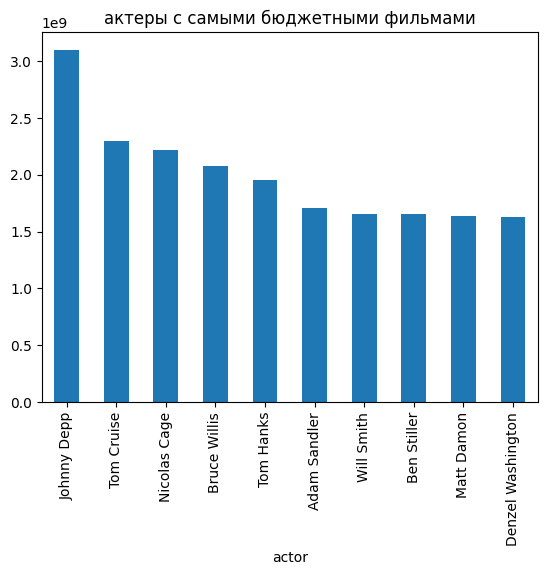

In [ ]:
plt.title('актеры с самыми бюджетными фильмами')
rev_and_act.groupby('actor').sum().sort_values('budget', ascending=False)['budget'].head(10).plot(kind='bar')
plt.show()